<a href="https://colab.research.google.com/github/Samkwizera/formative3_machinelearning_group15/blob/part-4/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Configuration - all parameters in one place (DRY principle)
CONFIG = {
    "x_data": np.array([1, 3]),
    "y_data": np.array([3, 6]),
    "initial_m": -1,
    "initial_b": 1,
    "learning_rate": 0.1,
    "num_iterations": 4
}

In [2]:
def predict(m, b, x):
    """Compute predictions: y_hat = mx + b"""
    return m * x + b


def compute_errors(y_pred, y_actual):
    """Compute errors: e = y_hat - y"""
    return y_pred - y_actual


def compute_mse(errors, n):
    """Compute Mean Squared Error: MSE = (1/n) * sum(errors^2)"""
    return np.sum(errors ** 2) / n


def compute_gradients(errors, x, n):
    """Compute gradients of the cost function.

    dJ/dm = (2/n) * sum(error * x)
    dJ/db = (2/n) * sum(error)
    """
    dJ_dm = (2 / n) * np.sum(errors * x)
    dJ_db = (2 / n) * np.sum(errors)
    return dJ_dm, dJ_db


def update_params(m, b, dJ_dm, dJ_db, alpha):
    """Update m and b using gradient descent.

    m_new = m - alpha * dJ/dm
    b_new = b - alpha * dJ/db
    """
    m_new = m - alpha * dJ_dm
    b_new = b - alpha * dJ_db
    return m_new, b_new

In [3]:
def display_iteration(i, m, b, x, y, y_pred, errors, mse, dJ_dm, dJ_db, m_new, b_new, alpha):
    """Display all calculations for a single gradient descent iteration."""
    n = len(x)

    print(f"{'='*60}")
    print(f"ITERATION {i}: m = {m}, b = {b}")
    print(f"{'='*60}")

    # Predictions
    print(f"\n  Predictions (y_hat = m*x + b):")
    for j in range(n):
        print(f"    y_hat({x[j]}) = {m} * ({x[j]}) + {b} = {round(y_pred[j], 4)}")

    # Errors
    print(f"\n  Errors (y_hat - y):")
    for j in range(n):
        print(f"    e({x[j]}) = {round(y_pred[j], 4)} - {y[j]} = {round(errors[j], 4)}")

    # MSE
    squared = errors ** 2
    print(f"\n  MSE = ({' + '.join([str(round(s, 6)) for s in squared])}) / {n} = {round(mse, 6)}")

    # Gradients
    print(f"\n  Gradients:")
    terms_m = [f"({round(errors[j], 4)})*({x[j]})" for j in range(n)]
    print(f"    dJ/dm = (2/{n}) * [{' + '.join(terms_m)}] = {round(dJ_dm, 6)}")
    terms_b = [f"({round(errors[j], 4)})" for j in range(n)]
    print(f"    dJ/db = (2/{n}) * [{' + '.join(terms_b)}] = {round(dJ_db, 6)}")

    # Updates
    print(f"\n  Update:")
    print(f"    m_new = {m} - {alpha} * ({round(dJ_dm, 6)}) = {round(m_new, 6)}")
    print(f"    b_new = {b} - {alpha} * ({round(dJ_db, 6)}) = {round(b_new, 6)}")

In [4]:
# Extract config values
x_data = CONFIG["x_data"]
y_data = CONFIG["y_data"]
m = CONFIG["initial_m"]
b = CONFIG["initial_b"]
alpha = CONFIG["learning_rate"]
num_iterations = CONFIG["num_iterations"]
n = len(x_data)

# History tracking
m_history = [m]
b_history = [b]
mse_history = []

print("LINEAR REGRESSION VIA GRADIENT DESCENT")
print(f"Model: y = mx + b")
print(f"Data points: {list(zip(x_data, y_data))}")
print(f"Initial m = {m}, b = {b}, alpha = {alpha}, iterations = {num_iterations}\n")

# --- Run each iteration with full visibility ---
for i in range(1, num_iterations + 1):

    # Step 1: Predictions
    y_pred = predict(m, b, x_data)

    # Step 2: Errors
    errors = compute_errors(y_pred, y_data)

    # Step 3: MSE
    mse = compute_mse(errors, n)
    mse_history.append(mse)

    # Step 4: Gradients
    dJ_dm, dJ_db = compute_gradients(errors, x_data, n)

    # Step 5: Update parameters
    m_new, b_new = update_params(m, b, dJ_dm, dJ_db, alpha)

    # Display everything
    display_iteration(i, m, b, x_data, y_data, y_pred, errors, mse, dJ_dm, dJ_db, m_new, b_new, alpha)

    # Move to next iteration
    m = round(m_new, 6)
    b = round(b_new, 6)
    m_history.append(m)
    b_history.append(b)
    print()

LINEAR REGRESSION VIA GRADIENT DESCENT
Model: y = mx + b
Data points: [(np.int64(1), np.int64(3)), (np.int64(3), np.int64(6))]
Initial m = -1, b = 1, alpha = 0.1, iterations = 4

ITERATION 1: m = -1, b = 1

  Predictions (y_hat = m*x + b):
    y_hat(1) = -1 * (1) + 1 = 0
    y_hat(3) = -1 * (3) + 1 = -2

  Errors (y_hat - y):
    e(1) = 0 - 3 = -3
    e(3) = -2 - 6 = -8

  MSE = (9 + 64) / 2 = 36.5

  Gradients:
    dJ/dm = (2/2) * [(-3)*(1) + (-8)*(3)] = -27.0
    dJ/db = (2/2) * [(-3) + (-8)] = -11.0

  Update:
    m_new = -1 - 0.1 * (-27.0) = 1.7
    b_new = 1 - 0.1 * (-11.0) = 2.1

ITERATION 2: m = 1.7, b = 2.1

  Predictions (y_hat = m*x + b):
    y_hat(1) = 1.7 * (1) + 2.1 = 3.8
    y_hat(3) = 1.7 * (3) + 2.1 = 7.2

  Errors (y_hat - y):
    e(1) = 3.8 - 3 = 0.8
    e(3) = 7.2 - 6 = 1.2

  MSE = (0.64 + 1.44) / 2 = 1.04

  Gradients:
    dJ/dm = (2/2) * [(0.8)*(1) + (1.2)*(3)] = 4.4
    dJ/db = (2/2) * [(0.8) + (1.2)] = 2.0

  Update:
    m_new = 1.7 - 0.1 * (4.4) = 1.26
    b_ne

In [5]:
print(f"Final parameters: m = {m}, b = {b}\n")

y_final = predict(m, b, x_data)

print("Final Predictions vs Actual Values:")
print(f"{'x':>5} | {'y_hat (predicted)':>18} | {'y (actual)':>12} | {'error':>10}")
print("-" * 52)
for j in range(n):
    err = round(y_final[j] - y_data[j], 6)
    print(f"{x_data[j]:>5} | {round(y_final[j], 6):>18} | {y_data[j]:>12} | {err:>10}")

Final parameters: m = 1.3336, b = 1.8968

Final Predictions vs Actual Values:
    x |  y_hat (predicted) |   y (actual) |      error
----------------------------------------------------
    1 |             3.2304 |            3 |     0.2304
    3 |             5.8976 |            6 |    -0.1024


In [6]:
def residuals(params, x, y):
    """Residuals for scipy least_squares: y_hat - y"""
    m_param, b_param = params
    return predict(m_param, b_param, x) - y


# Solve using SciPy (starting from same initial values)
result = least_squares(
    residuals,
    x0=[CONFIG["initial_m"], CONFIG["initial_b"]],
    args=(x_data, y_data)
)

m_optimal, b_optimal = result.x

print(f"SciPy Optimal Solution:")
print(f"  m = {round(m_optimal, 6)}")
print(f"  b = {round(b_optimal, 6)}")
print(f"\nOur gradient descent after 4 iterations:")
print(f"  m = {m}  (optimal: {round(m_optimal, 6)})")
print(f"  b = {b}  (optimal: {round(b_optimal, 6)})")
print(f"\n--> Our values are converging toward the optimal solution!")

SciPy Optimal Solution:
  m = 1.5
  b = 1.5

Our gradient descent after 4 iterations:
  m = 1.3336  (optimal: 1.5)
  b = 1.8968  (optimal: 1.5)

--> Our values are converging toward the optimal solution!


In [7]:
print(f"{'Iteration':>10} | {'m':>12} | {'b':>12} | {'MSE':>12}")
print("-" * 55)
for i in range(num_iterations):
    print(f"{i+1:>10} | {m_history[i]:>12} | {b_history[i]:>12} | {round(mse_history[i], 6):>12}")

print(f"\nTrend: MSE dropped from {mse_history[0]} to {round(mse_history[-1], 6)}")
print("m and b are clearly converging toward the optimal values,")
print("confirming gradient descent is working correctly.")

 Iteration |            m |            b |          MSE
-------------------------------------------------------
         1 |           -1 |            1 |         36.5
         2 |          1.7 |          2.1 |         1.04
         3 |         1.26 |          1.9 |        0.064
         4 |         1.34 |        1.916 |     0.034816

Trend: MSE dropped from 36.5 to 0.034816
m and b are clearly converging toward the optimal values,
confirming gradient descent is working correctly.


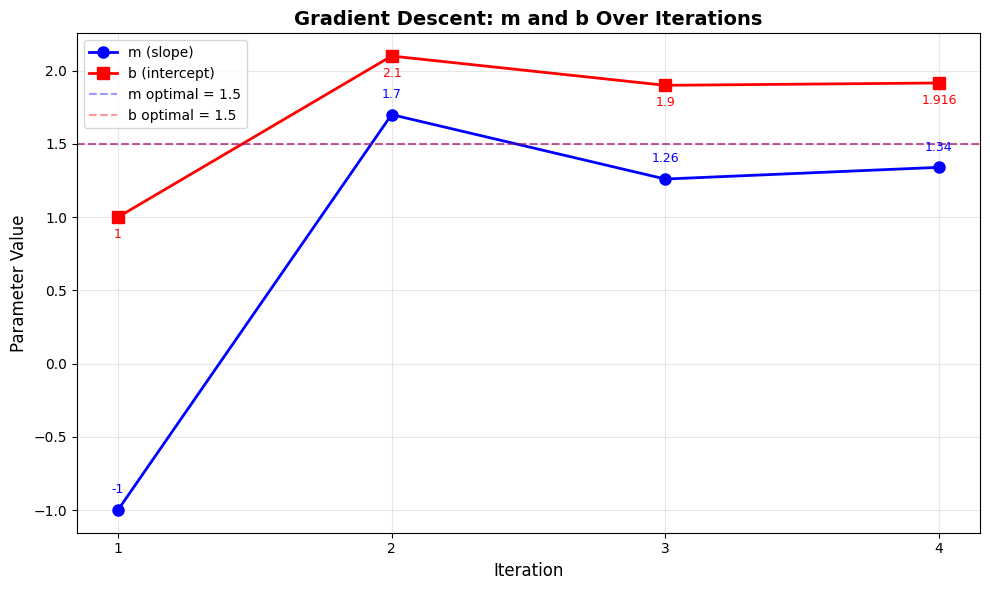

In [8]:
iterations = list(range(1, num_iterations + 1))
m_values = m_history[:-1]
b_values = b_history[:-1]

fig1, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(iterations, m_values, "bo-", linewidth=2, markersize=8, label="m (slope)")
ax1.plot(iterations, b_values, "rs-", linewidth=2, markersize=8, label="b (intercept)")

# Optimal reference lines
ax1.axhline(y=m_optimal, color="blue", linestyle="--", alpha=0.4, label=f"m optimal = {round(m_optimal, 2)}")
ax1.axhline(y=b_optimal, color="red", linestyle="--", alpha=0.4, label=f"b optimal = {round(b_optimal, 2)}")

# Value labels
for i, (mi, bi) in enumerate(zip(m_values, b_values)):
    ax1.annotate(f"{mi}", (iterations[i], mi), textcoords="offset points",
                 xytext=(0, 12), ha="center", fontsize=9, color="blue")
    ax1.annotate(f"{bi}", (iterations[i], bi), textcoords="offset points",
                 xytext=(0, -15), ha="center", fontsize=9, color="red")

ax1.set_xlabel("Iteration", fontsize=12)
ax1.set_ylabel("Parameter Value", fontsize=12)
ax1.set_title("Gradient Descent: m and b Over Iterations", fontsize=14, fontweight="bold")
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(iterations)

plt.tight_layout()
plt.show()

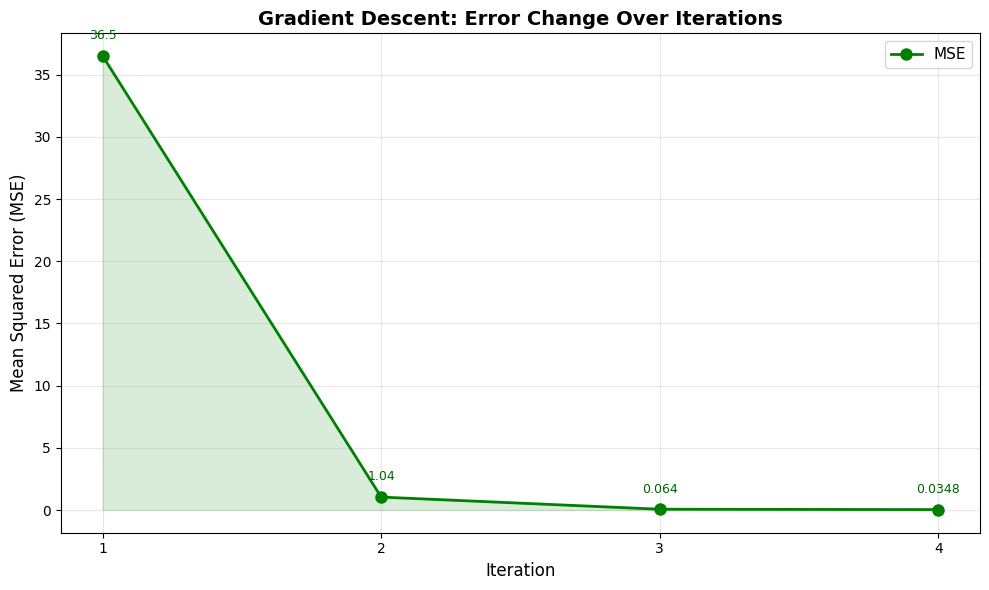

In [9]:
fig2, ax2 = plt.subplots(figsize=(10, 6))

ax2.plot(iterations, mse_history, "go-", linewidth=2, markersize=8, label="MSE")
ax2.fill_between(iterations, mse_history, alpha=0.15, color="green")

# Value labels
for i, mse_val in enumerate(mse_history):
    ax2.annotate(f"{round(mse_val, 4)}", (iterations[i], mse_val), textcoords="offset points",
                 xytext=(0, 12), ha="center", fontsize=9, color="darkgreen")

ax2.set_xlabel("Iteration", fontsize=12)
ax2.set_ylabel("Mean Squared Error (MSE)", fontsize=12)
ax2.set_title("Gradient Descent: Error Change Over Iterations", fontsize=14, fontweight="bold")
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(iterations)

plt.tight_layout()
plt.show()